# Grammar
Grammar rules object and finite grammar object.

In [1]:
from estnltk.finite_grammar.trees import Rule, Grammar

grammar = Grammar(start_symbols=['S'])
grammar.add(Rule('S', 'A'))
grammar.add(Rule('S', 'B'))
grammar.add(Rule('A', 'B F'))
grammar.add(Rule('B', 'G'))

grammar


Grammar:
	start: S
	terminals: F, G
	nonterminals: A, B, S
	legal attributes: frozenset()
	depth_limit: inf
	width_limit: inf
Rules:
	S -> A	: 0, val: default_validator, dec: default_decorator
	S -> B	: 0, val: default_validator, dec: default_decorator
	A -> B F	: 0, val: default_validator, dec: default_decorator
	B -> G	: 0, val: default_validator, dec: default_decorator

# Phrase list generator
Generates all phrases of the finite grammar.

In [2]:
from estnltk.finite_grammar import phrase_list_generator

for phrase in phrase_list_generator(grammar, depth_limit=float('inf')):
    print(phrase)

['G', 'F']
['G']


## Graph from layer

In [3]:
from estnltk import Text
from estnltk.layer import Layer
from estnltk.spans import Span

text = Text('a b c d e f g h i j k l m')

layer = Layer(name='test_grammar',
              attributes=['grammar_symbol']
              )
layer.add_span(Span( 0,  1, legal_attributes=['grammar_symbol'], grammar_symbol='A'))
layer.add_span(Span( 2,  3, legal_attributes=['grammar_symbol'], grammar_symbol='B'))
layer.add_span(Span( 4,  5, legal_attributes=['grammar_symbol'], grammar_symbol='C'))
layer.add_span(Span( 6,  7, legal_attributes=['grammar_symbol'], grammar_symbol='D'))
layer.add_span(Span( 8,  9, legal_attributes=['grammar_symbol'], grammar_symbol='E'))
layer.add_span(Span(10, 11, legal_attributes=['grammar_symbol'], grammar_symbol='F'))
layer.add_span(Span(12, 13, legal_attributes=['grammar_symbol'], grammar_symbol='G'))
layer.add_span(Span(14, 15, legal_attributes=['grammar_symbol'], grammar_symbol='H'))
layer.add_span(Span(16, 17, legal_attributes=['grammar_symbol'], grammar_symbol='I'))
layer.add_span(Span(18, 19, legal_attributes=['grammar_symbol'], grammar_symbol='J'))
layer.add_span(Span(20, 21, legal_attributes=['grammar_symbol'], grammar_symbol='K'))
layer.add_span(Span(22, 23, legal_attributes=['grammar_symbol'], grammar_symbol='L'))
layer.add_span(Span(24, 25, legal_attributes=['grammar_symbol'], grammar_symbol='M'))

text['test_grammar'] = layer

Create a graph that represents the layer.

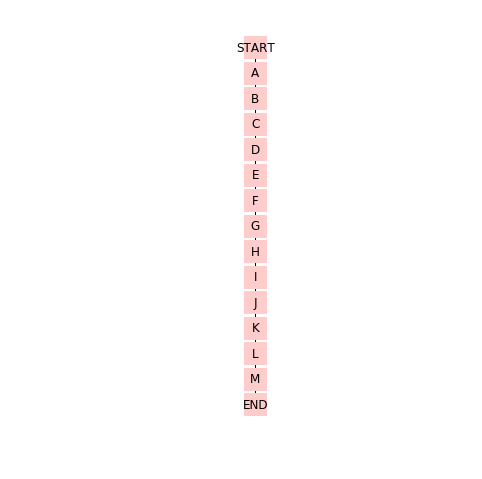

In [4]:
from estnltk.finite_grammar import layer_to_graph, plot_graph
from estnltk.finite_grammar import parse_graph

graph = layer_to_graph(text['test_grammar'])
plot_graph(graph,6)

## Parse
Use grammar to parse the graph above. Don't solve conflicts between the nodes.

In [5]:
class CountingDecorator:
    __name__ = 'counting_decorator'

    _count = 0

    def __call__(self, support):
        self._count += 1
        return {'count': self._count}

counting_decorator = CountingDecorator()

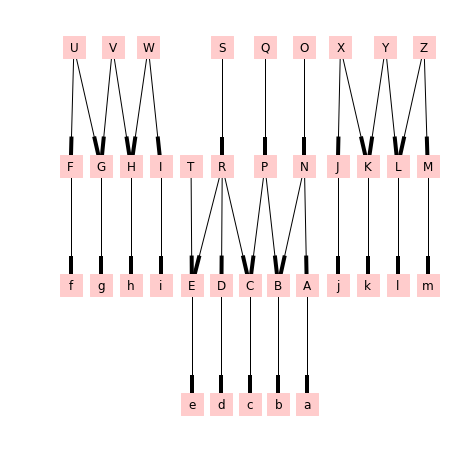

In [6]:
rules = []
rules.append(Rule('N', 'A B',   priority=2, group='g1', decorator=CountingDecorator()))
rules.append(Rule('O', 'N',     priority=0, group='g1', decorator=CountingDecorator()))
rules.append(Rule('P', 'B C',   priority=1, group='g1', decorator=CountingDecorator()))
rules.append(Rule('Q', 'P',     priority=5, group='g1', decorator=CountingDecorator()))
rules.append(Rule('R', 'C D E', priority=1, group='g1', decorator=CountingDecorator()))
rules.append(Rule('S', 'R',     priority=3, group='g2', decorator=CountingDecorator()))
rules.append(Rule('T', 'E',     priority=2, group='g2', decorator=CountingDecorator()))
rules.append(Rule('U', 'F G',   priority=1, group='g1', decorator=CountingDecorator()))
rules.append(Rule('V', 'G H',   priority=2, group='g1', decorator=CountingDecorator()))
rules.append(Rule('W', 'H I',   priority=3, group='g1', decorator=CountingDecorator()))
rules.append(Rule('X', 'J K',   priority=3, group='g1', decorator=CountingDecorator()))
rules.append(Rule('Y', 'K L',   priority=2, group='g1', decorator=CountingDecorator()))
rules.append(Rule('Z', 'L M',   priority=1, group='g1', decorator=CountingDecorator()))

grammar = Grammar(start_symbols=['P', 'Q', 'S', 'U', 'Z'], rules=rules, legal_attributes=['count'])

graph = layer_to_graph(text['test_grammar'])
parse_graph(graph, grammar, resolve_conflicts=False, debug=False)

plot_graph(graph.parse_trees, 6)

In [7]:
grammar


Grammar:
	start: P, Q, S, U, Z
	terminals: A, B, C, D, E, F, G, H, I, J, K, L, M
	nonterminals: N, O, P, Q, R, S, T, U, V, W, X, Y, Z
	legal attributes: frozenset({'count'})
	depth_limit: inf
	width_limit: inf
Rules:
	N -> A B	: 2, val: default_validator, dec: counting_decorator
	O -> N	: 0, val: default_validator, dec: counting_decorator
	P -> B C	: 1, val: default_validator, dec: counting_decorator
	Q -> P	: 5, val: default_validator, dec: counting_decorator
	R -> C D E	: 1, val: default_validator, dec: counting_decorator
	S -> R	: 3, val: default_validator, dec: counting_decorator
	T -> E	: 2, val: default_validator, dec: counting_decorator
	U -> F G	: 1, val: default_validator, dec: counting_decorator
	V -> G H	: 2, val: default_validator, dec: counting_decorator
	W -> H I	: 3, val: default_validator, dec: counting_decorator
	X -> J K	: 3, val: default_validator, dec: counting_decorator
	Y -> K L	: 2, val: default_validator, dec: counting_decorator
	Z -> L M	: 1, val: default_vali

In [8]:
grammar.has_finite_max_depth()

True

## Display nodes

In [9]:
graph

node type,name,start,end,decoration
PhonyNode,START,-inf,-inf,{}
TerminalNode,A,0,1,{}
NonTerminalNode,O,0,3,{'count': 1}
NonTerminalNode,N,0,3,{'count': 1}
TerminalNode,B,2,3,{}
NonTerminalNode,Q,2,5,{'count': 1}
NonTerminalNode,P,2,5,{'count': 1}
TerminalNode,C,4,5,{}
NonTerminalNode,R,4,9,{'count': 1}
NonTerminalNode,S,4,9,{'count': 1}


In [10]:
nodes = sorted(graph)
nodes

[PhonyNode(START, (-inf, -inf), 2795513439285960335),
 TerminalNode(A, (0, 1), -3815665651801647035),
 NonTerminalNode(O, (0, 3), -6255286152310744177),
 NonTerminalNode(N, (0, 3), -1296557959201267731),
 TerminalNode(B, (2, 3), 383858577313773005),
 NonTerminalNode(Q, (2, 5), -3491593641080462367),
 NonTerminalNode(P, (2, 5), -5995711263681466141),
 TerminalNode(C, (4, 5), -1306036643512321651),
 NonTerminalNode(R, (4, 9), -6775749806466806251),
 NonTerminalNode(S, (4, 9), -5235359237316552909),
 TerminalNode(D, (6, 7), 87685002235311053),
 TerminalNode(E, (8, 9), 2187856873293805509),
 NonTerminalNode(T, (8, 9), -7083370106739804563),
 TerminalNode(F, (10, 11), -7223737579580150467),
 NonTerminalNode(U, (10, 13), -4025160464544969087),
 TerminalNode(G, (12, 13), -1911042622703142667),
 NonTerminalNode(V, (12, 15), 2779574926077836890),
 TerminalNode(H, (14, 15), 4255912993786982693),
 NonTerminalNode(W, (14, 17), -7364655992119942577),
 TerminalNode(I, (16, 17), 4470013621801174061),

In [11]:
nodes[3]

NonTerminalNode(N, (0, 3), -1296557959201267731)

## Resolve conflicts

Use the same grammar to parse the same graph but also solve the conflicts. 

Note that
1. P and N are in conflict. Priority of N is lower and so N and O are removed despite the fact that O has the highest priority among N, O, P and Q.
2. P and R are in conflict, but priorities of P and R are equal, so none of them is removed.
3. R and T are in different groups and therefore not in conflict.
4. S and T are not in conflict.
5. The conflicts between U, V and W can be solved in two ways. The remaining nodes can be U and W or U alone. The outcome is not determined. The same holds for X, Y and Z.

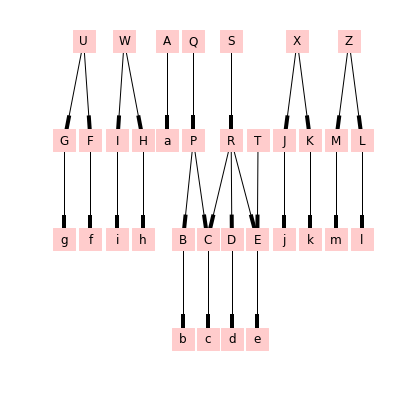

In [12]:
graph = layer_to_graph(text['test_grammar'])
parse_graph(graph, grammar, resolve_conflicts=True, debug=False)
plot_graph(graph.parse_trees, 5)

## Parse repetitions
The `REP(.)` and `SEQ(.)` symbols are equivalent and help to parse repetitions in the graph. Both parse one or more repetitions of the symbol in the parentheses.

In [13]:
text = Text('a b c c c d')

layer = Layer(name='test_grammar',
              attributes=['grammar_symbol']
              )
layer.add_span(Span( 0,  1, legal_attributes=['grammar_symbol'], grammar_symbol='A'))
layer.add_span(Span( 2,  3, legal_attributes=['grammar_symbol'], grammar_symbol='B'))
layer.add_span(Span( 4,  5, legal_attributes=['grammar_symbol'], grammar_symbol='C'))
layer.add_span(Span( 6,  7, legal_attributes=['grammar_symbol'], grammar_symbol='C'))
layer.add_span(Span( 8,  9, legal_attributes=['grammar_symbol'], grammar_symbol='C'))
layer.add_span(Span(10, 11, legal_attributes=['grammar_symbol'], grammar_symbol='D'))

text['test_grammar'] = layer

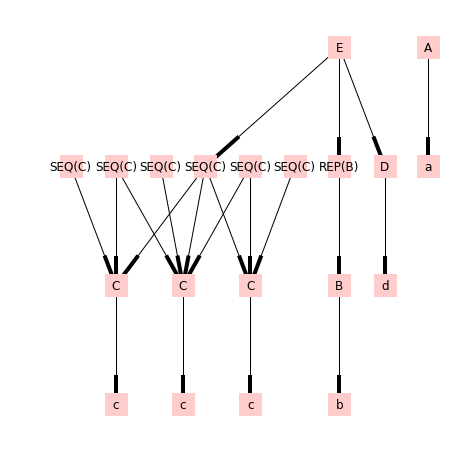

In [14]:
grammar = Grammar(start_symbols=['E'])

grammar.add(Rule('E', 'REP(B) SEQ(C) D', priority=3, group='g1'))
graph = layer_to_graph(text['test_grammar'])
parse_graph(graph, grammar, resolve_conflicts=False, width_limit=10, debug=False)

plot_graph(graph.parse_trees, 6)

## Grammar parsing tagger
Grammar parsing tagger uses all above to create a new layer. The output are the spans that correspond to the start_symbols of the grammar.

In [15]:
from estnltk.taggers.grammar_parsing.grammar_parsing_tagger import GrammarParsingTagger
tagger = GrammarParsingTagger(grammar,'test_grammar', attributes=['name', '_priority_', '_group_'],
                              resolve_conflicts=True)
tagger

GrammarParsingTagger(resolve_conflicts=True)

In [16]:
tagger.tag(text)
text.parse

layer name,attributes,parent,enveloping,ambiguous,span count
parse,"name, _priority_, _group_",None,test_grammar,False,1
text,start,end,name,_priority_,_group_
b c c c d,2,11,E,3,g1


# PhraseListTagger
## Example 1

In [17]:
from estnltk import Text
text_1 = Text('Patsient lasi jalga, sest vasaku jala suure varba pika \
               painutajalihase kõõluse rebend ajas tal kopsu üle maksa.')
text_1.analyse('morphology')

Text(text="Patsient lasi jalga, sest vasaku jala suure varba pika                painutajalihase kõõluse rebend ajas tal kopsu üle maksa.")

In [18]:
from estnltk.finite_grammar import PhraseListTagger

phrase_list = [
               ('jalg'),
               ('vasak', 'jalg',),
               ('parem', 'jalg',),
               ('kops',),
               ('vasak', 'kops'),
               ('parem', 'kops'),
               ('kõõlus',),
               ('lihas',),
               ('maks',),
               ('neer',),
               ('parem', 'neer'),
               ('vasak', 'neer'),
               ('varvas',),
               ('suur', 'varvas'),
              ]

def decorator(text, span, phrase):
    return {'match': phrase, 'dfsd':None}

def consistency_checker(text, span, phrase):
    return True

tagger = PhraseListTagger(layer_name='body_parts',
                          input_layer='morph_analysis',
                          input_attribute='lemma',
                          phrase_list=phrase_list,
                          attributes=('match',),
                          decorator=decorator,
                          consistency_checker=consistency_checker,
                          conflict_resolving_strategy= 'MAX')
tagger

PhraseListTagger(attributes=('match',), conflict_resolving_strategy=MAX, decorator=<function decorator at 0x7fbe4a393840>, input_attribute=lemma, input_layer=morph_analysis, layer_name=body_parts, phrase_list=14 phrases, validator=<function consistency_checker at 0x7fbe4a393488>)

In [19]:
tagger.tag(text_1)

Text(text="Patsient lasi jalga, sest vasaku jala suure varba pika                painutajalihase kõõluse rebend ajas tal kopsu üle maksa.")

In [20]:
text_1['body_parts']

Layer(name=body_parts, spans=SL[SL[SL[Span(vasaku, {'clitic': '', 'ending': '0', 'form': 'sg g', 'lemma': 'vasak', 'partofspeech': 'A', 'root': 'vasak', 'root_tokens': ('vasak',)})],
SL[Span(jala, {'clitic': '', 'ending': '0', 'form': 'sg g', 'lemma': 'jalg', 'partofspeech': 'S', 'root': 'jalg', 'root_tokens': ('jalg',)})]],
SL[SL[Span(suure, {'clitic': '', 'ending': '0', 'form': 'sg g', 'lemma': 'suur', 'partofspeech': 'A', 'root': 'suur', 'root_tokens': ('suur',)})],
SL[Span(varba, {'clitic': '', 'ending': '0', 'form': 'sg g', 'lemma': 'varvas', 'partofspeech': 'S', 'root': 'varvas', 'root_tokens': ('varvas',)})]],
SL[SL[Span(kõõluse, {'clitic': '', 'ending': '0', 'form': 'sg g', 'lemma': 'kõõlus', 'partofspeech': 'S', 'root': 'kõõlus', 'root_tokens': ('kõõlus',)})]],
SL[SL[Span(kopsu, {'clitic': '', 'ending': '0', 'form': 'adt', 'lemma': 'kops', 'partofspeech': 'S', 'root': 'kops', 'root_tokens': ('kops',)})]]])

Note that 'maksa' is not tagged. This is because Vabamorf thinks its lemma is 'maksma'.

## Example 2: postprocessing
Suppose that we want to postprocess the layer before adding it to the text object. Here we add an attribute 'latin_term' to the layer.

In [21]:
text = Text('Vasaku jala suure varba pika painutajalihase kõõluse rebend ajas patsiendi kopsu üle maksa.')
text.analyse('morphology')
latin_dict = {('suur', 'varvas'):'hallux', ('kõõlus',):'tendo', ('kops',):'pulmo'}

layer = tagger.tag(text, return_layer=True)
layer.attributes = ('match','latin_term')
for s in layer:
    s.latin_term = latin_dict[s.match]
text['body_parts'] = layer
text['body_parts']

Layer(name=body_parts, spans=SL[SL[SL[Span(suure, {'clitic': '', 'ending': '0', 'form': 'sg g', 'lemma': 'suur', 'partofspeech': 'A', 'root': 'suur', 'root_tokens': ('suur',)})],
SL[Span(varba, {'clitic': '', 'ending': '0', 'form': 'sg g', 'lemma': 'varvas', 'partofspeech': 'S', 'root': 'varvas', 'root_tokens': ('varvas',)})]],
SL[SL[Span(kõõluse, {'clitic': '', 'ending': '0', 'form': 'sg g', 'lemma': 'kõõlus', 'partofspeech': 'S', 'root': 'kõõlus', 'root_tokens': ('kõõlus',)})]],
SL[SL[Span(kopsu, {'clitic': '', 'ending': '0', 'form': 'adt', 'lemma': 'kops', 'partofspeech': 'S', 'root': 'kops', 'root_tokens': ('kops',)})]]])